# <span style="color:#0b486b">Visualization</span>

---

---

Importing the required packages. We will work with `matplotlib` package to viualialize


In [4]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import data from vsc file. Show the summary of data.

In [5]:
data = pd.read_csv('PSID.csv')
data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


## <span style="color:#0b486b">1. Boxplot </span>

Draw boxplot diagrams to get initial insights on data

Draw boxplot for Kids

<Figure size 14400x7200 with 0 Axes>

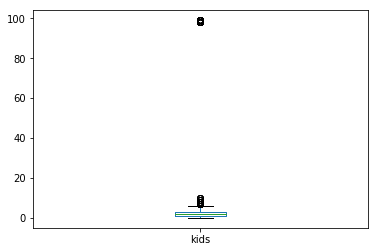

In [6]:
plt.figure(figsize=(200,100))
data.plot.box(y='kids')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

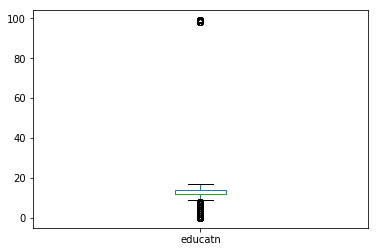

In [7]:
plt.figure(figsize=(200,100))
data.plot.box(y='educatn')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

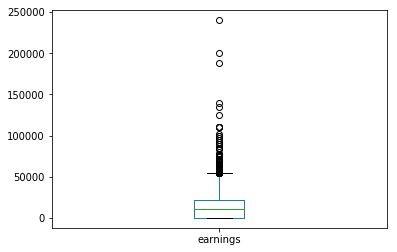

In [8]:
plt.figure(figsize=(200,100))
data.plot.box(y='earnings')
plt.show()

---
## <span style="color:#0b486b">Remove Outliers</span>

Remove outliers based on boxplot diagrams

<Figure size 14400x7200 with 0 Axes>

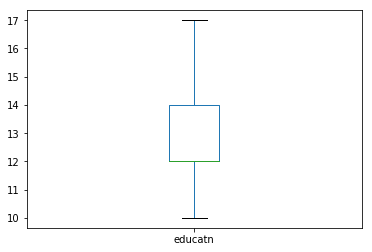

In [45]:
CleanedData = data[data.kids < 15]
CleanedData = CleanedData[CleanedData.educatn < 30]
CleanedData = CleanedData[CleanedData.educatn >= 10]
plt.figure(figsize=(200,100))
CleanedData.plot.box(y='educatn')
plt.show()
CleanedData.describe()

CleanedData.to_csv('CleanedData.csv')

---
## <span style="color:#0b486b">Correlation </span>

Correalation between columns

We can see 0.611034 realtionship between worked hours and earnings



In [13]:
data = pd.read_csv('CleanedData.csv')
data.corr(method ='pearson') 

,Unnamed: 0,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
Unnamed: 0,1.000000,1.000000,0.982993,-0.247615,-0.044440,-0.191249,-0.136180,-0.068794,0.086735
Seq No,1.000000,1.000000,0.982993,-0.247615,-0.044440,-0.191249,-0.136180,-0.068794,0.086735
intnum,0.982993,0.982993,1.000000,-0.245670,-0.056530,-0.203563,-0.139795,-0.069258,0.091350
persnum,-0.247615,-0.247615,-0.245670,1.000000,-0.073616,0.100913,0.033118,0.020164,-0.040637
age,-0.044440,-0.044440,-0.056530,-0.073616,1.000000,0.034053,0.113953,0.080526,0.132700
educatn,-0.191249,-0.191249,-0.203563,0.100913,0.034053,1.000000,0.364995,0.114666,-0.218916
earnings,-0.136180,-0.136180,-0.139795,0.033118,0.113953,0.364995,1.000000,0.611034,-0.233729
hours,-0.068794,-0.068794,-0.069258,0.020164,0.080526,0.114666,0.611034,1.000000,-0.172628
kids,0.086735,0.086735,0.091350,-0.040637,0.132700,-0.218916,-0.233729,-0.172628,1.000000
